In [1]:
!pip install talos 

     |████████████████████████████████| 53 kB 1.6 MB/s 
     |████████████████████████████████| 9.8 MB 20.8 MB/s 
     |████████████████████████████████| 5.4 MB 66.1 MB/s 
     |████████████████████████████████| 52 kB 584 kB/s 
     |████████████████████████████████| 462 kB 84.4 MB/s 
     |████████████████████████████████| 2.6 MB 80.4 MB/s 
  Created wheel for chances: filename=chances-0.1.9-py3-none-any.whl size=41608 sha256=e301a6627c031fbf517d49f5b76ba487b099fcd541200f72e4cb9e407c2b9398
  Stored in directory: /root/.cache/pip/wheels/f3/2e/7e/316f7da11ccf2195ff05e4a0186a4b5975be9bd0b0004198b6
Successfully built chances
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense

%matplotlib inline

import talos

In [3]:
# then we load the dataset
x, y = talos.templates.datasets.breast_cancer()

# and normalize every feature to mean 0, std 1
x = talos.utils.rescale_meanzero(x)

print(x.shape,y.shape)

(569, 30) (569,)


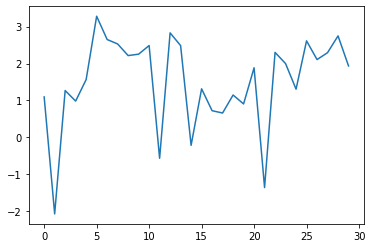

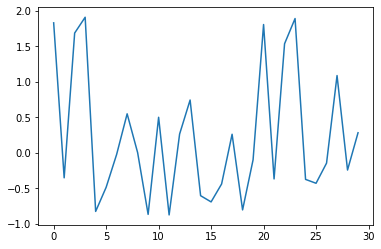

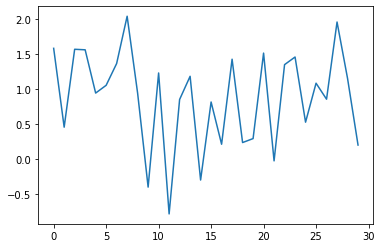

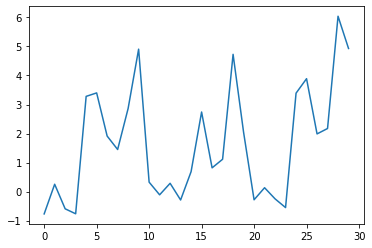

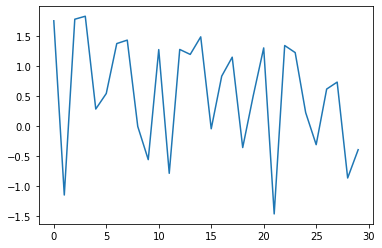

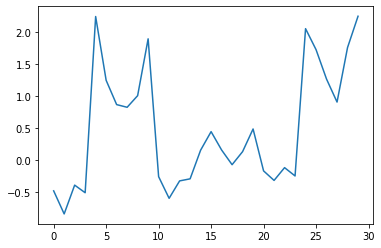

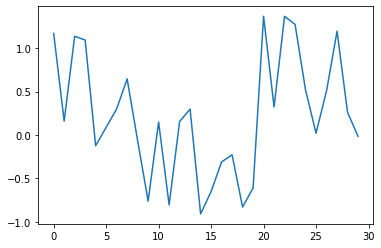

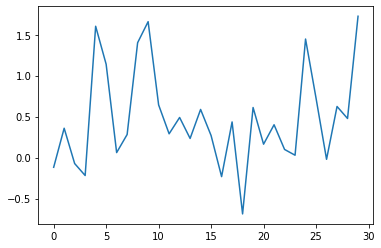

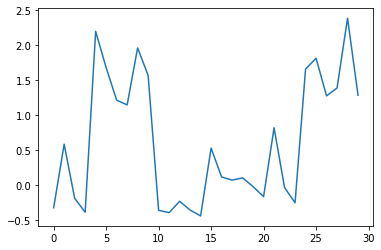

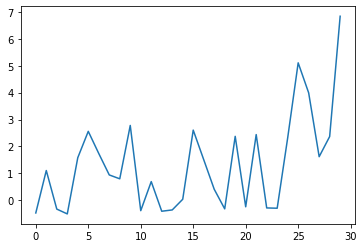

In [6]:
import matplotlib.pyplot as plt

for i in range(10):
  plt.figure()
  plt.plot(x[i])

In [10]:
# first we have to make sure to input data and params into the function
def breast_cancer_model(x_train, y_train, x_val, y_val, params):

    model = Sequential()
    model.add(Dense(params['first_neuron'], input_dim=x_train.shape[1],
                    activation=params['activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.add(Dropout(params['dropout']))

    model.add(Dense(1, activation=params['last_activation'],
                    kernel_initializer=params['kernel_initializer']))
    
    model.compile(loss=params['losses'],
                  optimizer=params['optimizer'],
                  metrics=['acc', talos.utils.metrics.f1score])
    
    history = model.fit(x_train, y_train, 
                        validation_data=[x_val, y_val],
                        batch_size=params['batch_size'],
                        epochs=params['epochs'],
                        verbose=0)

    return history, model

In [11]:
# then we can go ahead and set the parameter space
p = {'first_neuron':[9,10,11],
     'hidden_layers':[0, 1, 2],
     'batch_size': [30],
     'epochs': [100],
     'dropout': [0],
     'kernel_initializer': ['uniform','normal'],
     'optimizer': ['Nadam', 'Adam'],
     'losses': ['binary_crossentropy'],
     'activation':['relu', 'elu'],
     'last_activation': ['sigmoid']}

In [12]:
# and run the experiment
t = talos.Scan(x=x,
               y=y,
               model=breast_cancer_model,
               params=p,
               experiment_name='breast_cancer',
               round_limit=10)


100%|██████████| 10/10 [01:18<00:00,  7.87s/it]


In [16]:
t.details

experiment_name           breast_cancer
random_method          uniform_mersenne
reduction_method                   None
reduction_interval                   50
reduction_window                     20
reduction_threshold                 0.2
reduction_metric                val_acc
complete_time            03/01/22/17:37
x_shape                       (569, 30)
y_shape                          (569,)
dtype: object

In [21]:
#Look at experiment runs and sort it by ascending loss values 
t.data.sort_values("val_loss")


,start,end,duration,round_epochs,loss,acc,f1score,val_loss,val_acc,val_f1score,activation,batch_size,dropout,epochs,first_neuron,hidden_layers,kernel_initializer,last_activation,losses,optimizer
8,03/01/22-173649,03/01/22-173656,6.742596,100,0.038409,0.989950,0.988281,0.091457,0.976608,0.964415,elu,30,0,100,9,0,uniform,sigmoid,binary_crossentropy,Adam
2,03/01/22-173606,03/01/22-173613,6.488243,100,0.037358,0.987437,0.979618,0.092855,0.976608,0.964415,elu,30,0,100,10,1,uniform,sigmoid,binary_crossentropy,Adam
3,03/01/22-173613,03/01/22-173619,6.367280,100,0.036180,0.989950,0.916616,0.095704,0.976608,0.964415,elu,30,0,100,11,1,normal,sigmoid,binary_crossentropy,Adam
6,03/01/22-173634,03/01/22-173642,7.611557,100,0.033199,0.989950,0.985532,0.095798,0.982456,0.974219,relu,30,0,100,9,0,uniform,sigmoid,binary_crossentropy,Nadam
4,03/01/22-173620,03/01/22-173626,6.448192,100,0.037231,0.987437,0.985686,0.095872,0.982456,0.974219,elu,30,0,100,10,1,normal,sigmoid,binary_crossentropy,Adam
9,03/01/22-173656,03/01/22-173704,7.531818,100,0.035323,0.989950,0.988051,0.096416,0.976608,0.964415,relu,30,0,100,9,1,uniform,sigmoid,binary_crossentropy,Nadam
7,03/01/22-173642,03/01/22-173649,7.495545,100,0.031218,0.992462,0.989899,0.098659,0.976608,0.964415,relu,30,0,100,11,2,uniform,sigmoid,binary_crossentropy,Nadam
5,03/01/22-173626,03/01/22-173634,7.505799,100,0.033729,0.987437,0.984030,0.099069,0.982456,0.974219,relu,30,0,100,9,0,normal,sigmoid,binary_crossentropy,Nadam
0,03/01/22-173547,03/01/22-173558,11.461573,100,0.036998,0.987437,0.980882,0.100189,0.982456,0.974219,elu,30,0,100,10,2,normal,sigmoid,binary_crossentropy,Nadam
1,03/01/22-173559,03/01/22-173606,7.504305,100,0.031431,0.992462,0.991308,0.102586,0.976608,0.966283,relu,30,0,100,10,2,normal,sigmoid,binary_crossentropy,Nadam


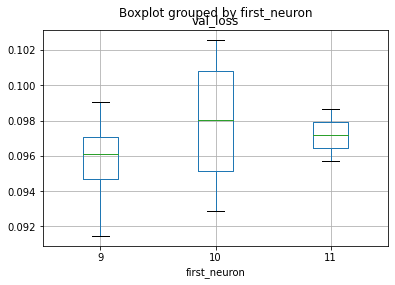

In [34]:
t.data.boxplot("val_loss","first_neuron")


In [36]:
t.data.describe()

,duration,round_epochs,loss,acc,f1score,val_loss,val_acc,val_f1score,batch_size,dropout,epochs,first_neuron,hidden_layers
count,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0,10.0,10.0,10.000000,10.000000
mean,7.515691,100.0,0.035108,0.989447,0.978990,0.096860,0.978947,0.968524,30.0,0.0,100.0,9.800000,1.000000
std,1.479181,0.0,0.002570,0.001982,0.022228,0.003348,0.003020,0.004935,0.0,0.0,0.0,0.788811,0.816497
min,6.367280,100.0,0.031218,0.987437,0.916616,0.091457,0.976608,0.964415,30.0,0.0,100.0,9.000000,0.000000
25%,6.551831,100.0,0.033331,0.987437,0.981669,0.095727,0.976608,0.964415,30.0,0.0,100.0,9.000000,0.250000
50%,7.499925,100.0,0.035752,0.989950,0.985609,0.096144,0.976608,0.965349,30.0,0.0,100.0,10.000000,1.000000
75%,7.525313,100.0,0.037173,0.989950,0.988224,0.098966,0.982456,0.974219,30.0,0.0,100.0,10.000000,1.750000
max,11.461573,100.0,0.038409,0.992462,0.991308,0.102586,0.982456,0.974219,30.0,0.0,100.0,11.000000,2.000000
